In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
# reading the data
df=pd.read_csv('cleaned_data.csv')

In [3]:
df.head()

,Name,Price,Distance_travelled,Date_of_purchase,Ownership,Fuel_type,Transmission,Insurance_type,City,Company_name,Model_name
0,Maruti Wagon R 1.0 VXI,239899,12501,2011-03-01,First,Petrol,MANUAL,Comprehensive,NewDelhi,Maruti,Wagon R 1.0 VXI
1,Maruti Alto K10 LXI,178099,34028,2011-07-01,First,Petrol,MANUAL,Third Party,NewDelhi,Maruti,Alto K10 LXI
2,Maruti Swift ZDI,394199,24022,2013-05-01,First,Diesel,MANUAL,Comprehensive,NewDelhi,Maruti,Swift ZDI
3,Hyundai Santro Xing GL PLUS,231299,35726,2013-11-01,Second,Petrol,MANUAL,Third Party,NewDelhi,Hyundai,Santro Xing GL PLUS
4,Hyundai Grand i10 Sportz(O) 1.2 MT,452899,19994,2017-11-01,Second,Petrol,MANUAL,Zero Depreciation,NewDelhi,Hyundai,Grand i10 Sportz(O) 1.2 MT


In [4]:
# drop name column
df.drop('Name',axis=1,inplace=True)

In [5]:
df.head()

,Price,Distance_travelled,Date_of_purchase,Ownership,Fuel_type,Transmission,Insurance_type,City,Company_name,Model_name
0,239899,12501,2011-03-01,First,Petrol,MANUAL,Comprehensive,NewDelhi,Maruti,Wagon R 1.0 VXI
1,178099,34028,2011-07-01,First,Petrol,MANUAL,Third Party,NewDelhi,Maruti,Alto K10 LXI
2,394199,24022,2013-05-01,First,Diesel,MANUAL,Comprehensive,NewDelhi,Maruti,Swift ZDI
3,231299,35726,2013-11-01,Second,Petrol,MANUAL,Third Party,NewDelhi,Hyundai,Santro Xing GL PLUS
4,452899,19994,2017-11-01,Second,Petrol,MANUAL,Zero Depreciation,NewDelhi,Hyundai,Grand i10 Sportz(O) 1.2 MT


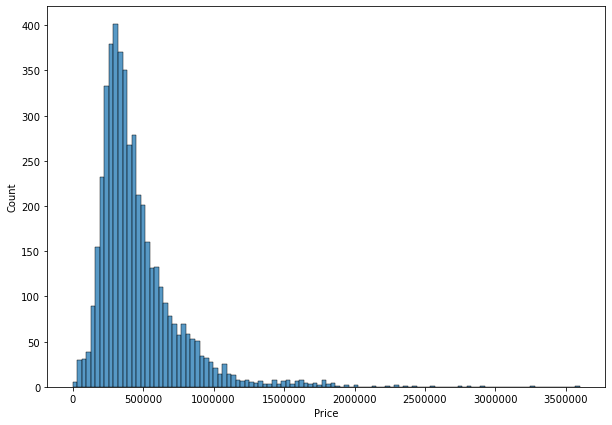

In [6]:
plt.figure(figsize=(10,7))
sns.histplot(df['Price'])
plt.ticklabel_format(style='plain', axis='x')

Most of the prices are between 0 to 100000 and it is approximately noramlly distributed

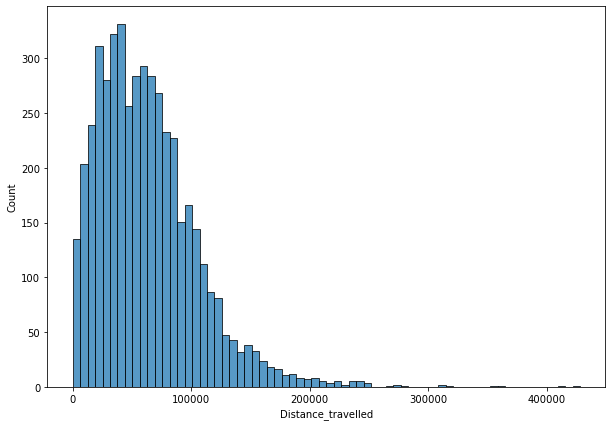

In [7]:
plt.figure(figsize=(10,7))
sns.histplot(df['Distance_travelled'])
plt.ticklabel_format(style='plain', axis='x')

It is a right skewed distribution and mostly between 0 to 1,50,000

Creatinga a new feature car_life from date of purchase

In [8]:
df['Date_of_purchase'][0].split('-')[0]

'2011'

In [9]:
df['car_life']=2021-(df['Date_of_purchase'].apply(lambda x:int(x.split('-')[0])))

In [10]:
df['car_life'] # getting life of car used in years

0       10
1       10
2        8
3        8
4        4
        ..
4742    10
4743    12
4744    15
4745    10
4746    13
Name: car_life, Length: 4747, dtype: int64

<AxesSubplot:xlabel='car_life', ylabel='Count'>

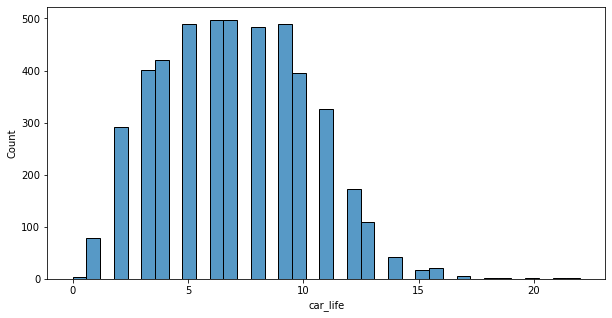

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['car_life'])

Dropping the date of purchase column

In [12]:
df.drop('Date_of_purchase',axis=1,inplace=True)

In [13]:
df.head()

,Price,Distance_travelled,Ownership,Fuel_type,Transmission,Insurance_type,City,Company_name,Model_name,car_life
0,239899,12501,First,Petrol,MANUAL,Comprehensive,NewDelhi,Maruti,Wagon R 1.0 VXI,10
1,178099,34028,First,Petrol,MANUAL,Third Party,NewDelhi,Maruti,Alto K10 LXI,10
2,394199,24022,First,Diesel,MANUAL,Comprehensive,NewDelhi,Maruti,Swift ZDI,8
3,231299,35726,Second,Petrol,MANUAL,Third Party,NewDelhi,Hyundai,Santro Xing GL PLUS,8
4,452899,19994,Second,Petrol,MANUAL,Zero Depreciation,NewDelhi,Hyundai,Grand i10 Sportz(O) 1.2 MT,4


In [14]:
distint_comp=df['Company_name'].unique()

In [19]:
#sorted(df[df['Company_name']=='Maruti']['Model_name'].unique())

<AxesSubplot:xlabel='Ownership', ylabel='Count'>

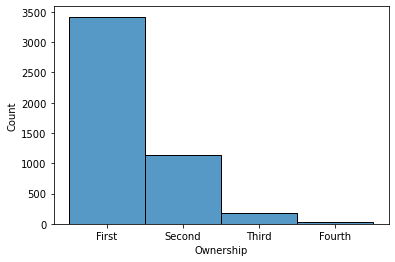

In [21]:
sns.histplot(df['Ownership'])

<AxesSubplot:xlabel='City', ylabel='Count'>

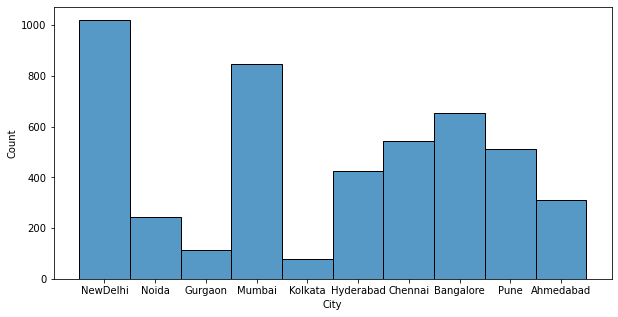

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df['City'])

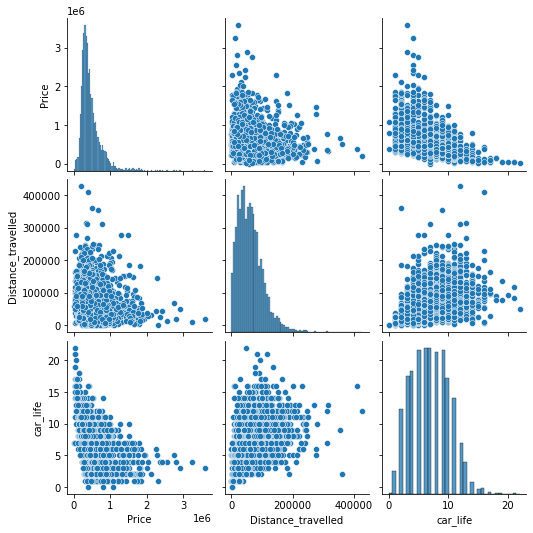

In [23]:
sns.pairplot(df)

<AxesSubplot:xlabel='Price', ylabel='City'>

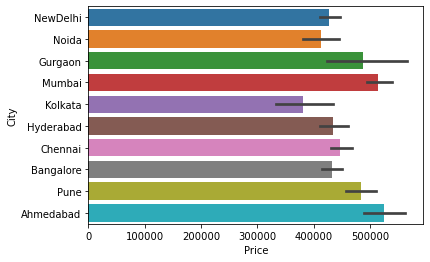

In [24]:
sns.barplot(x=df['Price'],y=df['City'])

prices in all cities nearly similar but kolkata is least priced and ahmedabad is highest priced

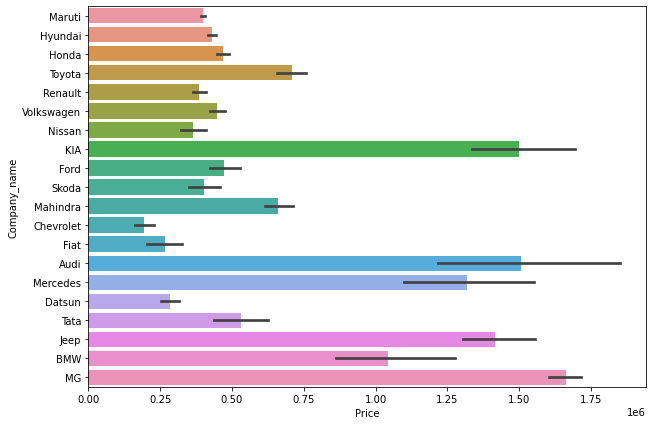

In [25]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Price'],y=df['Company_name']);

MG,KIA,Audi,Jeep,Mercedes are highly priced and  
Chevrolet,Fiat,Datsun are low priced

In [26]:
# check the correlation between features
df.corr()

,Price,Distance_travelled,car_life
Price,1.000000,-0.124901,-0.538144
Distance_travelled,-0.124901,1.000000,0.431339
car_life,-0.538144,0.431339,1.000000


Distance travelled and car_life are negatively correlated with price because as distance travelled or used life of car increases its price depreciates

#### check for outliers

In [88]:
sum(df['Model_name'].value_counts()>9)

109

In [60]:
sum(df['Model_name'].value_counts()==10)

9

In [58]:
df['Model_name']=df['Model_name'].apply(lambda x : x.replace('PETROL',''))
df['Model_name']=df['Model_name'].apply(lambda x : x.replace('DIESEL',''))
df['Model_name']=df['Model_name'].apply(lambda x : x.replace('AT',''))

In [127]:
data1=df.copy()
data1['Model_name']=df['Model_name'].apply(lambda x:' '.join(x.split()[:3]))

In [128]:
data1.head()

,Price,Distance_travelled,Ownership,Fuel_type,Transmission,Insurance_type,City,Company_name,Model_name,car_life
0,239899,12501,First,Petrol,MANUAL,Comprehensive,NewDelhi,Maruti,Wagon R 1.0,10
1,178099,34028,First,Petrol,MANUAL,Third Party,NewDelhi,Maruti,Alto K10 LXI,10
2,394199,24022,First,Diesel,MANUAL,Comprehensive,NewDelhi,Maruti,Swift ZDI,8
3,231299,35726,Second,Petrol,MANUAL,Third Party,NewDelhi,Hyundai,Santro Xing GL,8
4,452899,19994,Second,Petrol,MANUAL,Zero Depreciation,NewDelhi,Hyundai,Grand i10 Sportz(O),4


In [135]:
# deleting model names with less than 10 in number to reduce noise in the data
data1=data1.groupby('Model_name').filter(lambda x:len(x)>10)

In [136]:
data1.head()

,Price,Distance_travelled,Ownership,Fuel_type,Transmission,Insurance_type,City,Company_name,Model_name,car_life
0,239899,12501,First,Petrol,MANUAL,Comprehensive,NewDelhi,Maruti,Wagon R 1.0,10
1,178099,34028,First,Petrol,MANUAL,Third Party,NewDelhi,Maruti,Alto K10 LXI,10
2,394199,24022,First,Diesel,MANUAL,Comprehensive,NewDelhi,Maruti,Swift ZDI,8
3,231299,35726,Second,Petrol,MANUAL,Third Party,NewDelhi,Hyundai,Santro Xing GL,8
6,533899,19330,Second,Petrol,MANUAL,Comprehensive,NewDelhi,Hyundai,Elite i20 SPORTZ,4


<AxesSubplot:xlabel='Model_name', ylabel='Density'>

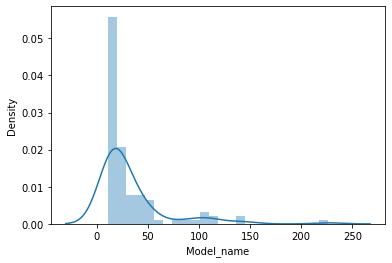

In [138]:
sns.distplot(data1['Model_name'].value_counts())

### Converting Categorical to numerical

we use label encoding for ownership as first is highly valued second is next and so on in an order.

In [121]:
#from sklearn.preprocessing import LabelEncoder

In [139]:
d={'First':1,'Second':2,'Third':3,'Fourth':4}

In [140]:
data1['Ownership']=data1['Ownership'].apply(lambda x: d[x] )

Label encoding can be used for company name and model as they are in more number which can lead to dummy variable trap

In [141]:
from sklearn.preprocessing import LabelEncoder

In [142]:
l_encoder=LabelEncoder()

In [143]:
data1['Company_name']=l_encoder.fit_transform(data1['Company_name'])

In [144]:
data1['Model_name']=l_encoder.fit_transform(data1['Model_name'])

In [145]:
data1.head()

,Price,Distance_travelled,Ownership,Fuel_type,Transmission,Insurance_type,City,Company_name,Model_name,car_life
0,239899,12501,1,Petrol,MANUAL,Comprehensive,NewDelhi,5,85,10
1,178099,34028,1,Petrol,MANUAL,Third Party,NewDelhi,5,4,10
2,394199,24022,1,Diesel,MANUAL,Comprehensive,NewDelhi,5,77,8
3,231299,35726,2,Petrol,MANUAL,Third Party,NewDelhi,3,67,8
6,533899,19330,2,Petrol,MANUAL,Comprehensive,NewDelhi,3,33,4


for other categorical variables we can use one hot encoding

In [146]:
data1=pd.get_dummies(data1,columns=['Fuel_type','Transmission','Insurance_type','City'],drop_first=True)

In [147]:
pd.set_option('display.max_columns', 100)
data1.head()

,Price,Distance_travelled,Ownership,Company_name,Model_name,car_life,Fuel_type_Petrol,Fuel_type_Petrol + CNG,Fuel_type_Petrol + LPG,Transmission_MANUAL,Insurance_type_Insurance Expired,Insurance_type_Not Available,Insurance_type_Third Party,Insurance_type_Zero Depreciation,City_Bangalore,City_Chennai,City_Gurgaon,City_Hyderabad,City_Kolkata,City_Mumbai,City_NewDelhi,City_Noida,City_Pune
0,239899,12501,1,5,85,10,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,178099,34028,1,5,4,10,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
2,394199,24022,1,5,77,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,231299,35726,2,3,67,8,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
6,533899,19330,2,3,33,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [148]:
data1.reset_index(drop=True,inplace=True)

In [149]:
# saving the model for further usage
data1.to_csv('final_data.csv',index=False)